In [15]:
#TASK 1
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
# Step 2: Load your CSV file
df = pd.read_csv('C:/Users/divya/Downloads/Iris.csv')

In [19]:
# Step 3: Drop 'Id' column
df.drop('Id', axis=1, inplace=True)

In [21]:
# Step 4: Encode 'Species' column
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])  # Converts to 0,1,2

In [23]:
# Step 5: Split into Features and Target
X = df.drop('Species', axis=1)  # Features: SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm
y = df['Species']               # Target: Encoded Species

In [25]:
# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Step 7: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Step 8: Train K-Nearest Neighbors Classifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [33]:
# Step 9: Predict
y_pred = model.predict(X_test)

In [35]:
# Step 10: Evaluate
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 1.0

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



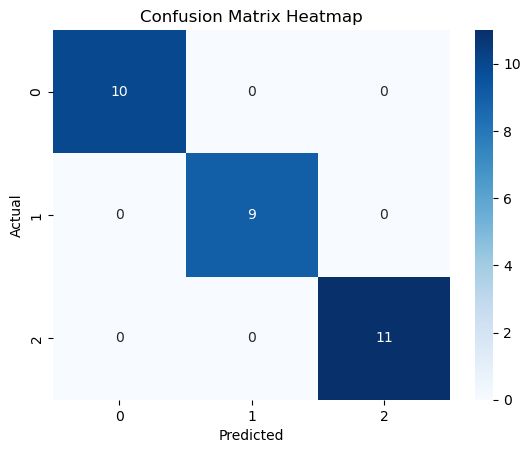

In [37]:
# Step 11: Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [73]:
print(df_clean.columns)


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')


In [120]:
# Task 2: Unemployment Analysis with Python

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Set visualisation style
sns.set(style="whitegrid")

In [124]:
# Load the dataset (uploaded file)

df = pd.read_csv('C:/Users/divya/Downloads/archive (2)/Unemployment in India.csv')
df = pd.read_csv('C:/Users/divya/Downloads/archive (2)/Unemployment_Rate_upto_11_2020.csv')

In [126]:
# Display dataset information
print("Dataset Columns:\n", df.columns)
print("\nDataset Shape:", df.shape)
print("\nChecking for missing values:\n", df.isnull().sum())

Dataset Columns:
 Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude'],
      dtype='object')

Dataset Shape: (267, 9)

Checking for missing values:
 Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64


In [128]:
# Drop empty (NaN) rows if any
df_clean = df.dropna()
print("\nDataset Shape after dropping NaN values:", df_clean.shape)


Dataset Shape after dropping NaN values: (267, 9)


In [170]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

# View cleaned dataset fully
print("\nFull cleaned dataset:\n", df_clean)




Full cleaned dataset:
                Region       Date  Frequency   Estimated Unemployment Rate (%)  \
0      Andhra Pradesh 2020-01-31          M                              5.48   
1      Andhra Pradesh 2020-02-29          M                              5.83   
2      Andhra Pradesh 2020-03-31          M                              5.79   
3      Andhra Pradesh 2020-04-30          M                             20.51   
4      Andhra Pradesh 2020-05-31          M                             17.43   
5      Andhra Pradesh 2020-06-30          M                              3.31   
6      Andhra Pradesh 2020-07-31          M                              8.34   
7      Andhra Pradesh 2020-08-31          M                              6.96   
8      Andhra Pradesh 2020-09-30          M                              6.40   
9      Andhra Pradesh 2020-10-31          M                              6.59   
10              Assam 2020-01-31          M                              4.66   
11  

In [132]:
# -------- FIX: Rename ' Date' column to 'Date' --------
df_clean.rename(columns={' Date': 'Date'}, inplace=True)

In [156]:
# Convert 'Date' column to datetime format
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%d-%m-%Y', errors='coerce')

In [158]:
# Extract Year and Month for trend analysis
df_clean['Year'] = df_clean['Date'].dt.year
df_clean['Month'] = df_clean['Date'].dt.month

In [160]:
# Check which years are present (for Covid-19 impact analysis)
print("\nYears in dataset:", df_clean['Year'].unique())


Years in dataset: [2020]


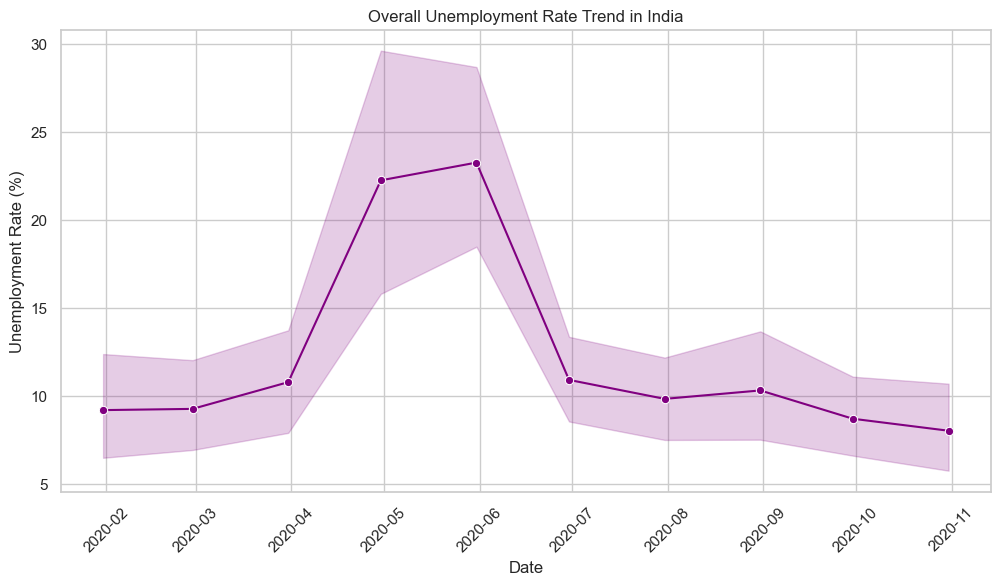

In [162]:
# ----------------- Trend Analysis -------------------

# 1. Overall Unemployment Trend (India Level)
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y=' Estimated Unemployment Rate (%)', data=df_clean, marker='o', color='purple')
plt.title('Overall Unemployment Rate Trend in India')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.show()


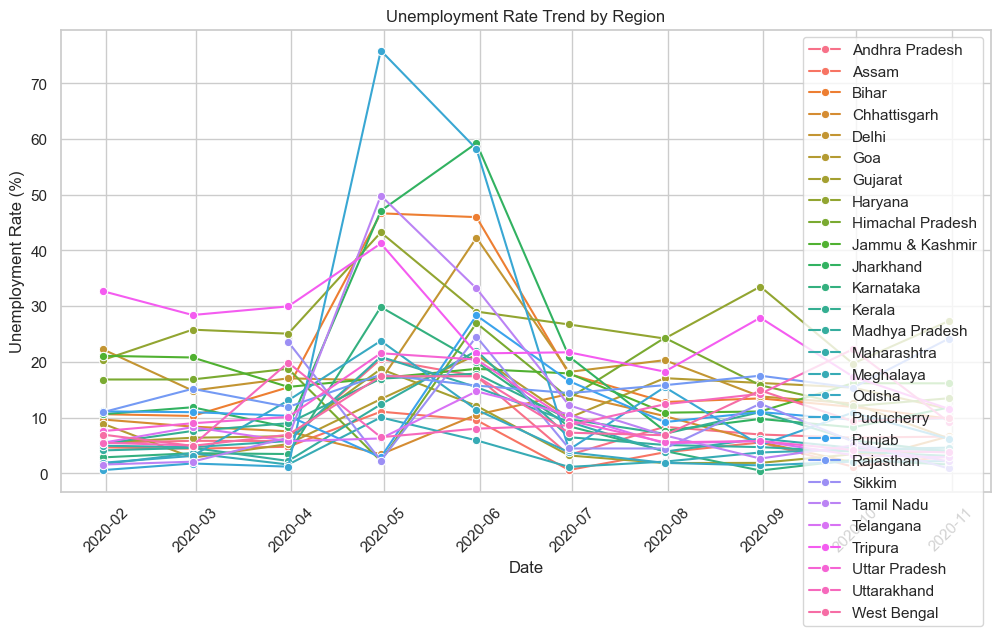

In [141]:
# 2. Region-wise Unemployment Trend
plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y=' Estimated Unemployment Rate (%)', hue='Region', data=df_clean, marker='o')
plt.title('Unemployment Rate Trend by Region')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.show()

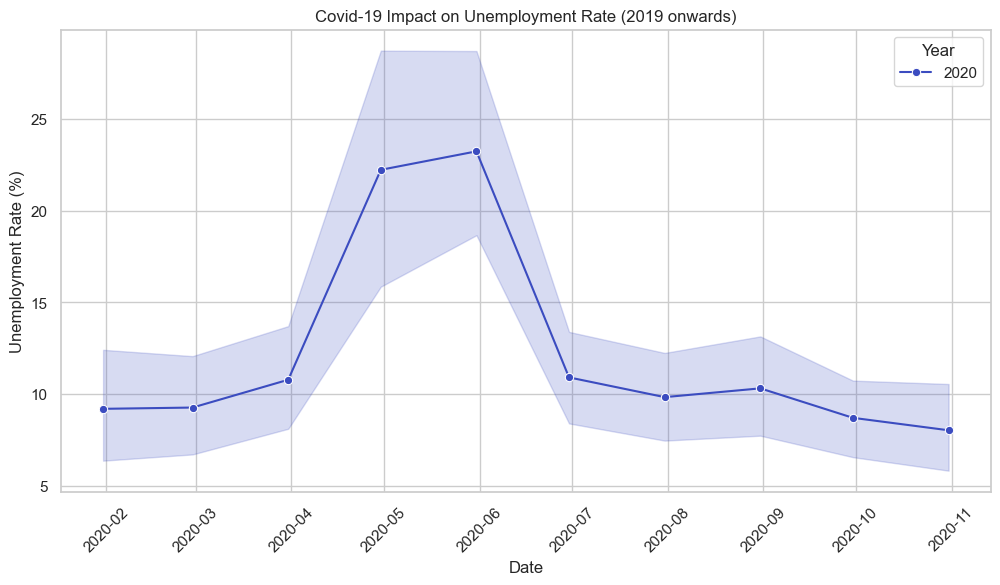

In [242]:
# ----------------- COVID-19 Impact Analysis -------------------

# Data for 2019 onwards (Covid impact period)
covid_df = df_clean[df_clean['Year'] >= 2019]

plt.figure(figsize=(12,6))
sns.lineplot(x='Date', y=' Estimated Unemployment Rate (%)', hue='Year', data=covid_df, palette='coolwarm', marker='o')
plt.title('Covid-19 Impact on Unemployment Rate (2019 onwards)')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

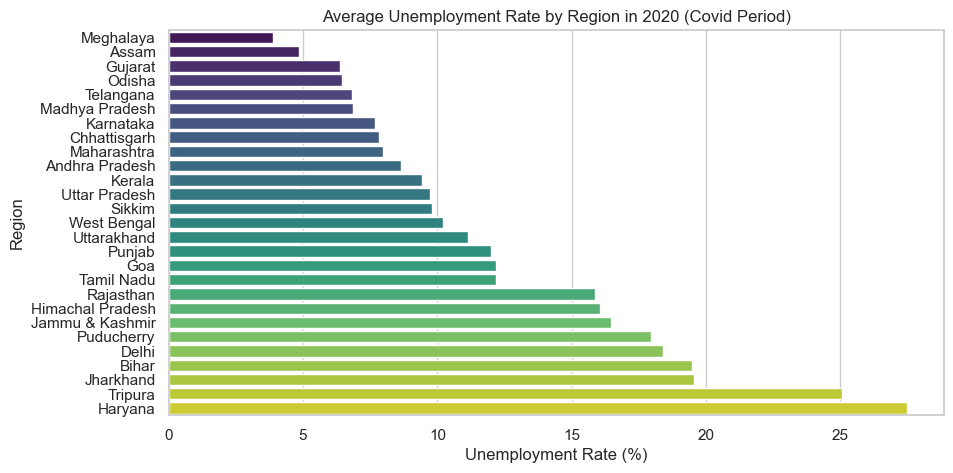

In [238]:
# ----------------- Region-wise Average during 2020 (Covid Year) -------------------

if 2020 in df_clean['Year'].unique():
    covid_2020 = df_clean[df_clean['Year'] == 2020]
    region_avg = covid_2020.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values()
    plt.figure(figsize=(10,5))
    sns.barplot(x=region_avg.values, y=region_avg.index, hue=region_avg.index, dodge=False, palette='viridis', legend=False)

    plt.title('Average Unemployment Rate by Region in 2020 (Covid Period)')
    plt.xlabel('Unemployment Rate (%)')
    plt.ylabel('Region')
    plt.show()

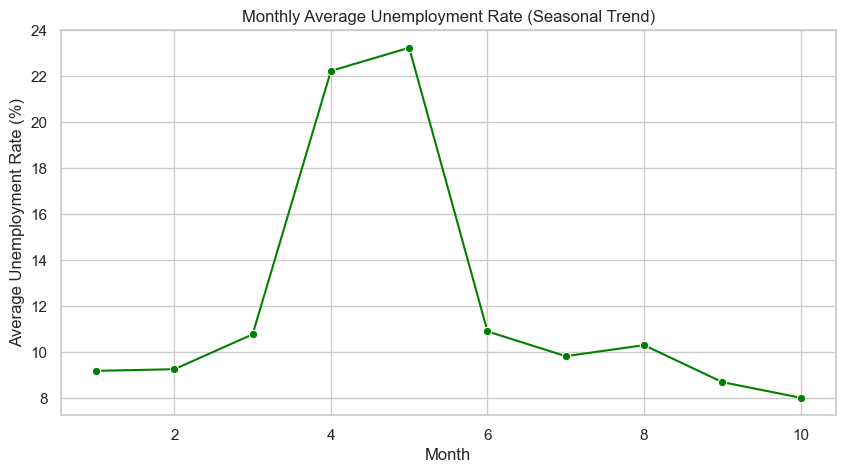

In [244]:
# ----------------- Seasonal/Monthly Trend Analysis -------------------

monthly_avg = df_clean.groupby('Month')[' Estimated Unemployment Rate (%)'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_avg.index, y=monthly_avg.values, marker='o', color='green')
plt.title('Monthly Average Unemployment Rate (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Average Unemployment Rate (%)')
plt.grid(True)
plt.show()

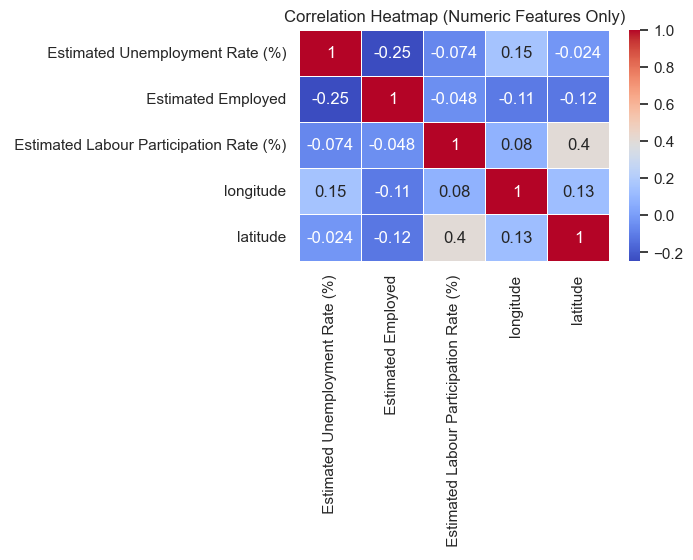

In [228]:
# ----------------- Correlation Heatmap (for numerical features) -------------------

# Select only numeric columns to avoid error
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(5,3))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()

In [172]:
#TASK 3 CAR PRICE PREDICTION WITH MACHINE LEARNING 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

%matplotlib inline


In [176]:
# Load your dataset
df = pd.read_csv('C:/Users/divya/Downloads/archive (3)/car data.csv') 

print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nFirst 5 rows:\n", df.head())


Shape: (301, 9)

Columns:
 Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

First 5 rows:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [200]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)

# No unnecessary columns dropped (if 'Car_Name' needed for analysis, keep it)


Missing values:
 Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


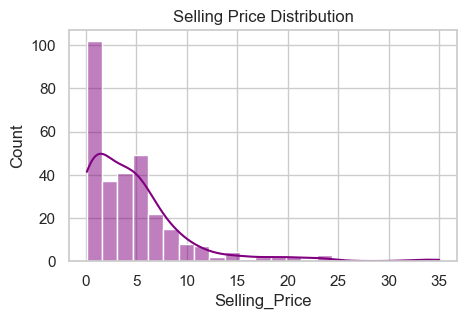

In [226]:
# Selling Price Distribution
plt.figure(figsize=(5,3))
sns.histplot(df['Selling_Price'], kde=True, color='purple')
plt.title('Selling Price Distribution')
plt.show()


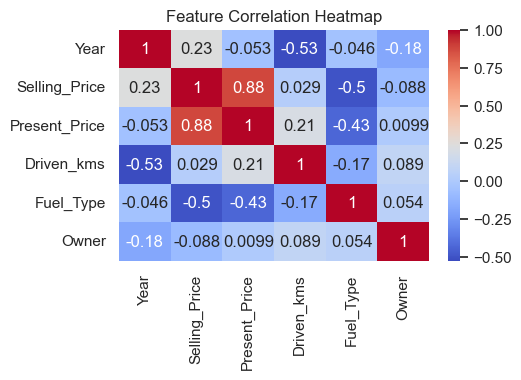

In [224]:
# Correlation Heatmap — NUMERIC columns only to avoid errors
plt.figure(figsize=(5,3))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

In [204]:
le = LabelEncoder()
for col in ['Fuel_Type', 'Selling_type', 'Transmission']:  # Corrected column names
    df[col] = le.fit_transform(df[col])

print("Encoded Data Sample:\n", df.head())


Encoded Data Sample:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0     ritz  2014           3.35           5.59       27000          2   
1      sx4  2013           4.75           9.54       43000          1   
2     ciaz  2017           7.25           9.85        6900          2   
3  wagon r  2011           2.85           4.15        5200          2   
4    swift  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0  


In [206]:
# Define X and y
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # Dropping 'Car_Name' for modeling
y = df['Selling_Price']

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Features shape: (299, 7)
Target shape: (299,)


In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)


Training Set Shape: (239, 7)
Test Set Shape: (60, 7)


In [210]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [ 3.42071393e-01  4.41254421e-01 -9.41472378e-06 -1.22494762e+00
 -1.29057772e+00 -1.57792987e+00  6.98019859e-01]
Intercept: -683.1699340066083


In [212]:
y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))


MAE: 1.5408119549693389
MSE: 6.675444100493368
RMSE: 2.5836880811145466
R² Score: 0.740993435641311


In [216]:
# Predict using a single example from the test set
sample = X_test.iloc[0]
predicted_price = model.predict(sample.to_frame().T)[0]

print("Sample Input Features:", sample.to_dict())
print("Predicted Selling Price:", predicted_price)



Sample Input Features: {'Year': 2016.0, 'Present_Price': 11.8, 'Driven_kms': 9010.0, 'Fuel_Type': 2.0, 'Selling_type': 0.0, 'Transmission': 1.0, 'Owner': 0.0}
Predicted Selling Price: 7.540145023909076


In [3]:
#TASK 4 :- Sales Prediction using Python

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
# 2. Load the Dataset
df = pd.read_csv("C:/Users/divya/Downloads/archive (2)/Advertising.csv")  

In [7]:
# Drop the unnecessary index column
df.drop(columns=["Unnamed: 0"], inplace=True)

In [9]:
# 3. Display Data Info
print("Dataset Info:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

First 5 Rows:
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


In [11]:
# 4. Check for Missing Values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


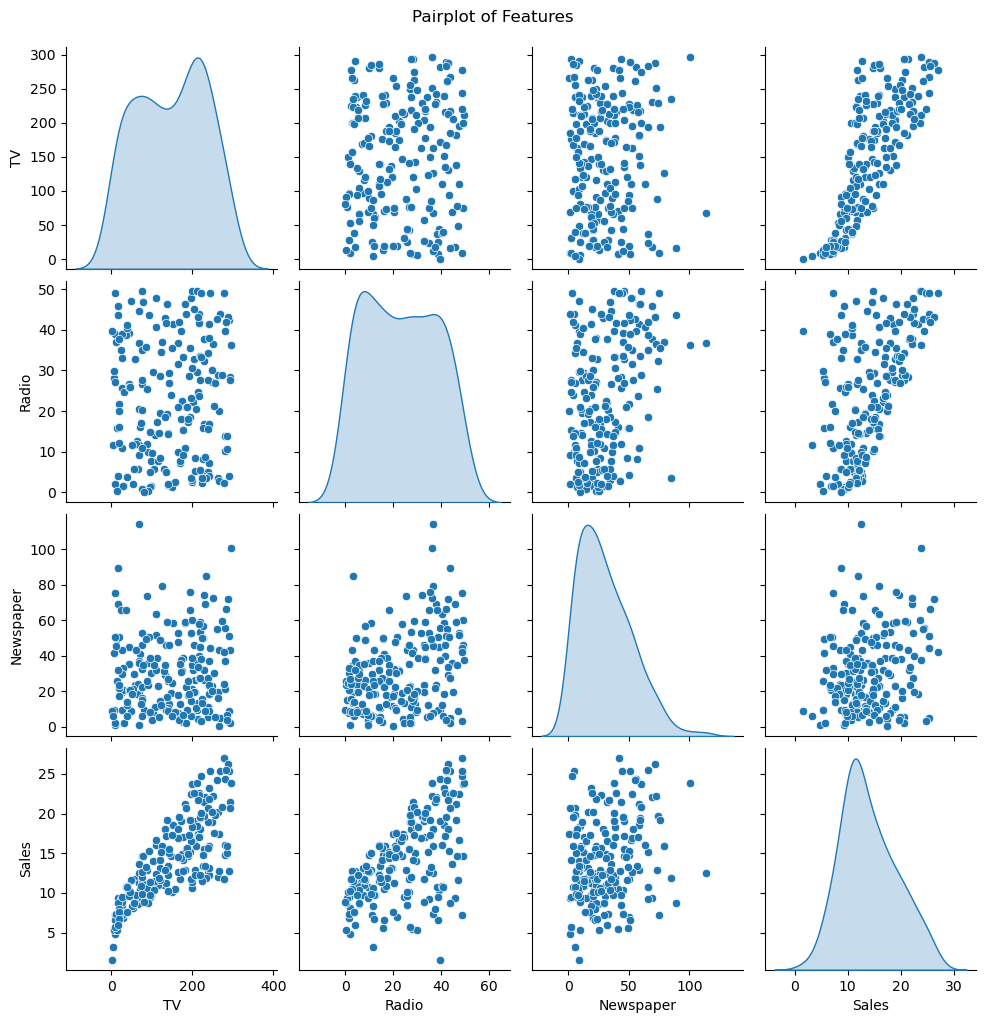

In [13]:
# 5. Exploratory Data Analysis (EDA)
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

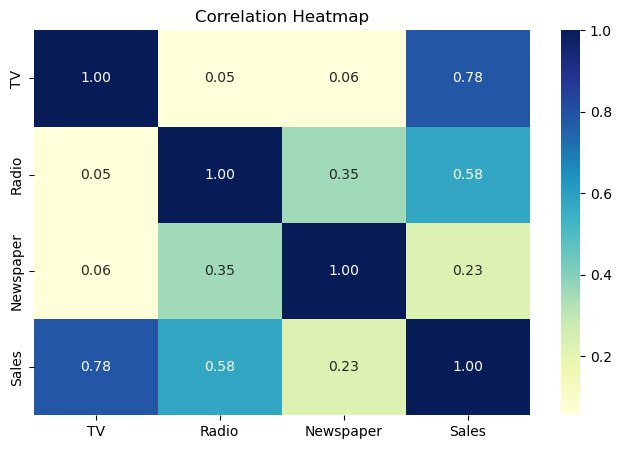

In [14]:
# Correlation Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [15]:
# 6. Feature Selection
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [16]:
# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# 8. Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [23]:
# 9. Predictions and Evaluation - Linear Regression
y_pred_lr = lr_model.predict(X_test)

In [25]:
print("\nLinear Regression Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))


Linear Regression Performance:
MAE: 1.4607567168117606
MSE: 3.1740973539761046
R² Score: 0.899438024100912


In [27]:
# 10. Model Training - Random Forest Regressor (optional)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [29]:
print("\nRandom Forest Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R² Score:", r2_score(y_test, y_pred_rf))


Random Forest Performance:
MAE: 0.6200999999999988
MSE: 0.5907322499999988
R² Score: 0.9812843792541843


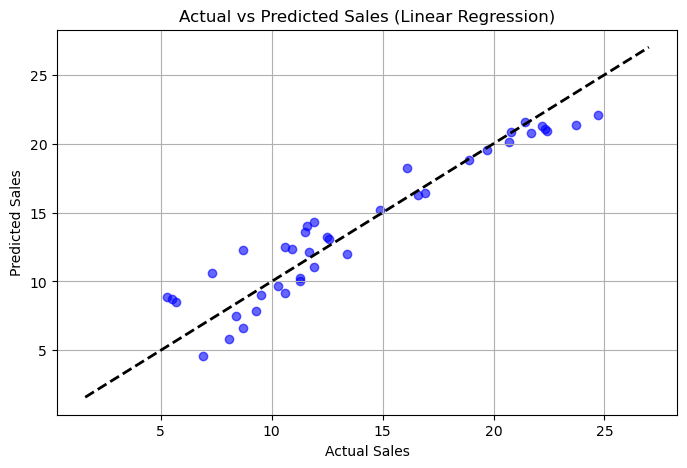

In [31]:
# 11. Visualization - Actual vs Predicted (Linear Regression)
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales (Linear Regression)")
plt.grid(True)
plt.show()

In [33]:
# 12. Business Insights
print("\n--- Business Insights ---")
print("1. TV and Radio have strong correlation with Sales.")
print("2. Newspaper ads have lower impact comparatively.")
print("3. Focus on TV and Radio platforms for better sales outcomes.")
print("4. Use predictive model to plan advertising budgets.")


--- Business Insights ---
1. TV and Radio have strong correlation with Sales.
2. Newspaper ads have lower impact comparatively.
3. Focus on TV and Radio platforms for better sales outcomes.
4. Use predictive model to plan advertising budgets.
